In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, confusion_matrix,ConfusionMatrixDisplay,classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('/content/pima-data.csv')


In [8]:
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [9]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [10]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [11]:
df.shape

(768, 10)

In [12]:
df.isnull().sum()

,0
num_preg,0
glucose_conc,0
diastolic_bp,0
thickness,0
insulin,0
bmi,0
diab_pred,0
age,0
skin,0
diabetes,0


In [13]:
# Now, Let's see the distribution of outcome variable i.e Diabetes
df['diabetes'].value_counts()

,count
diabetes,
False,500
True,268


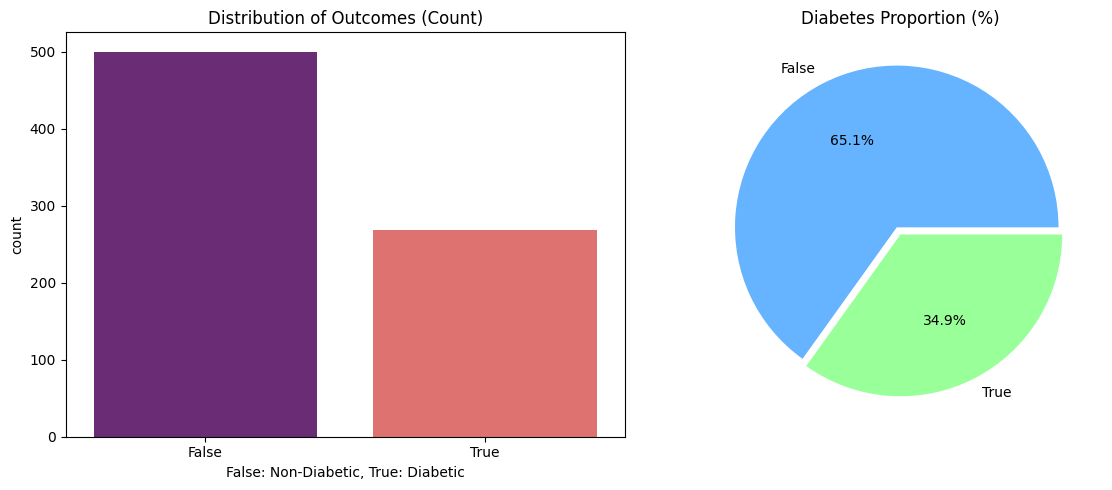

In [14]:
# Plotting settings
plt.figure(figsize=(12, 5))

# 1. Count Plot (Bar Chart)
plt.subplot(1, 2, 1)
sns.countplot(x='diabetes', data=df, palette='magma')
plt.title('Distribution of Outcomes (Count)')
plt.xlabel('False: Non-Diabetic, True: Diabetic')

# 2. Pie Chart (Percentage)
plt.subplot(1, 2, 2)
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], explode=(0.05, 0))
plt.title('Diabetes Proportion (%)')
plt.ylabel('') # To remove the label from the side

plt.tight_layout()
plt.show()

In [15]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


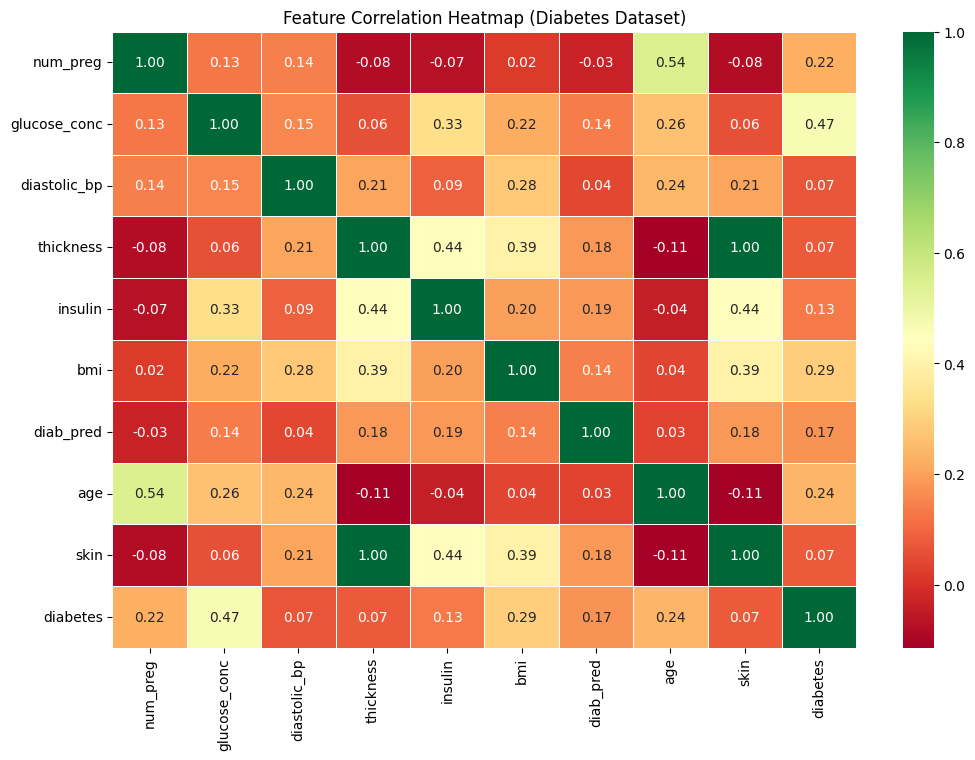

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap (Diabetes Dataset)')
plt.show()

In [17]:
# checking for 0's in input features which seems to be impossible
# List of features jahan 0 impossible hai
# (Note: num_preg can be 0 so this feature was not included)
impossible_zero_cols = ['glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi']

print("--- Analysis of Impossible Zero Values ---")
total_rows = len(df)

for col in impossible_zero_cols:
    zero_count = (df[col] == 0).sum()
    zero_percent = (zero_count / total_rows) * 100
    print(f"Feature: {col:15} | Zeros: {zero_count:3} | Percentage: {zero_percent:.2f}%")

# 3. Optional: Visualizing rows where multiple features have 0
print(f"\nTotal Rows in Dataset: {total_rows}")

--- Analysis of Impossible Zero Values ---
Feature: glucose_conc    | Zeros:   5 | Percentage: 0.65%
Feature: diastolic_bp    | Zeros:  35 | Percentage: 4.56%
Feature: thickness       | Zeros: 227 | Percentage: 29.56%
Feature: insulin         | Zeros: 374 | Percentage: 48.70%
Feature: bmi             | Zeros:  11 | Percentage: 1.43%

Total Rows in Dataset: 768


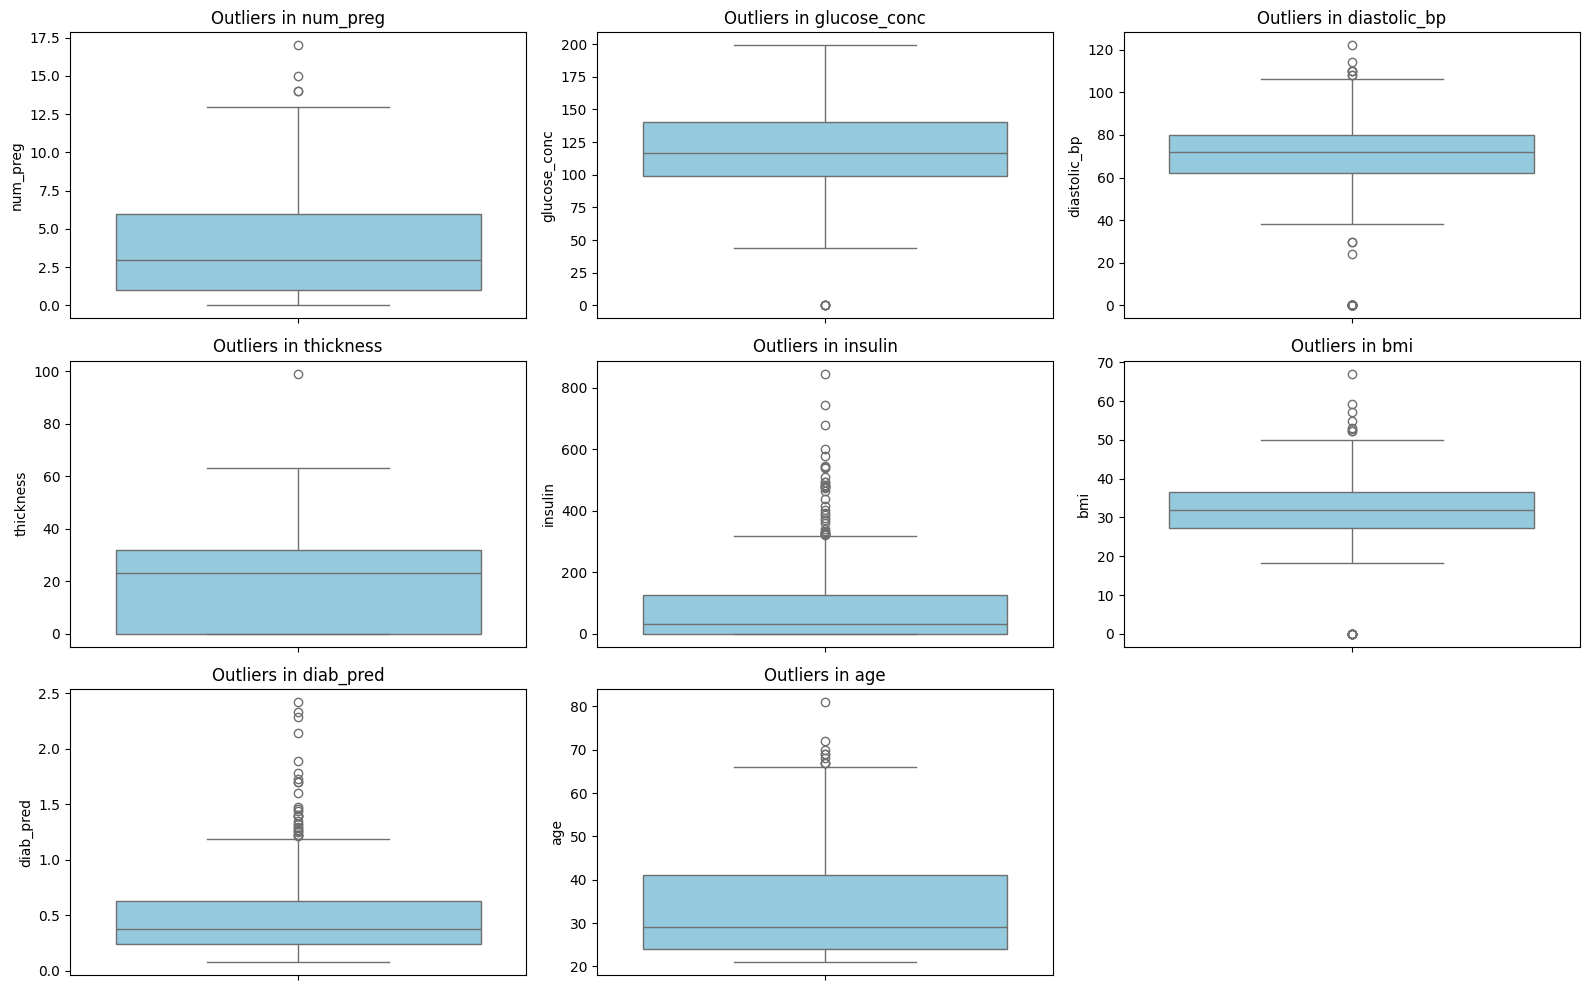

In [18]:
features = df.drop(columns=['skin', 'diabetes'])

# 3. Plotting settings
plt.figure(figsize=(16, 10))

# create boxplot for each feature
for i, col in enumerate(features.columns):
    plt.subplot(3, 3, i + 1) # grid of 3 rows and 3 cols
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Outliers in {col}')
    plt.tight_layout()

In [19]:
''' num_preg,diastolic_bp,insulin,bmi,diab_pred,age all these input features are having outliers so we need to impute those 0 values in these features with median '''


' num_preg,diastolic_bp,insulin,bmi,diab_pred,age all these input features are having outliers so we need to impute those 0 values in these features with median '

In [20]:
df.drop(columns=['skin'],inplace=True)

In [21]:
df.columns


Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [22]:
# 2. Define our logic lists
impossible_zero_cols = ['glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi']
outlier_cols = ['num_preg', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age']

# 3. Categorize features based on your requirement
# Impossible 0 + Outliers -> Median
median_cols = [col for col in impossible_zero_cols if col in outlier_cols]

# Impossible 0 + No Outliers -> Mean
mean_cols = [col for col in impossible_zero_cols if col not in outlier_cols]

print(f"Median Imputation for: {median_cols}")
print(f"Mean Imputation for: {mean_cols}")

# 4. Perform Imputation
# Median Impute
for col in median_cols:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

# Mean Impute
for col in mean_cols:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].mean())

# 5. Verification
print("\nChecking for remaining impossible zeros:")
print(df[impossible_zero_cols].eq(0).sum())

Median Imputation for: ['diastolic_bp', 'insulin', 'bmi']
Mean Imputation for: ['glucose_conc', 'thickness']

Checking for remaining impossible zeros:
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
dtype: int64


In [23]:
input_features = [col for col in df.columns if col != 'diabetes']

print("--- Final Zero-Value Audit ---")
print(f"{'Feature':<20} | {'Zero Count':<10}")
print("-" * 35)

# 2. Check each feature for zeros
for col in input_features:
    zero_count = (df[col] == 0).sum()
    print(f"{col:<20} | {zero_count:<10}")

print("-" * 35)

# 3. Quick Summary logic for Interview
remaining_impossible = (df[['glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi']] == 0).sum().sum()

if remaining_impossible == 0:
    print("SUCCESS: All biologically impossible zeros have been removed.")
else:
    print(f"ATTENTION: There are still {remaining_impossible} impossible zeros left.")

--- Final Zero-Value Audit ---
Feature              | Zero Count
-----------------------------------
num_preg             | 111       
glucose_conc         | 0         
diastolic_bp         | 0         
thickness            | 0         
insulin              | 0         
bmi                  | 0         
diab_pred            | 0         
age                  | 0         
-----------------------------------
SUCCESS: All biologically impossible zeros have been removed.


In [24]:
X = df.drop(columns=['diabetes'],axis=1)

In [25]:
Y = df['diabetes']

In [26]:
X

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47


In [27]:
Y

,diabetes
0,True
1,False
2,True
3,False
4,True
...,...
763,False
764,False
765,False
766,True


In [28]:
# 1. Map True to 1 and False to 0
# It is very fastest and cleanest way
df['diabetes'] = df['diabetes'].astype(int)

# 2. Re-assign y (Target) after conversion
Y= df['diabetes']

In [29]:
Y

,diabetes
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [30]:
# Create a list of selected input features by dropping output feature and redundant column named as skin
input_features = [col for col in df.columns if col != 'diabetes']

print("--- Outlier Detection Analysis ---\n")

outlier_summary = {}

for col in input_features:
    # 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # 2. Calculate IQR
    IQR = Q3 - Q1

    # 3. Define Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 4. Identify Outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    # Store and Print Results
    outlier_summary[col] = len(outliers)

    print(f"Feature: {col}")
    print(f"  - IQR: {IQR:.2f} | Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Total Outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f" -Outlier Values: {outliers.values[:]}")
    print("-" * 40)

print("\nFinal Outlier Count Summary:")
for feature, count in outlier_summary.items():
    print(f"{feature}: {count}")

--- Outlier Detection Analysis ---

Feature: num_preg
  - IQR: 5.00 | Bounds: [-6.50, 13.50]
  - Total Outliers: 4
 -Outlier Values: [15 17 14 14]
----------------------------------------
Feature: glucose_conc
  - IQR: 40.50 | Bounds: [39.00, 201.00]
  - Total Outliers: 0
----------------------------------------
Feature: diastolic_bp
  - IQR: 16.00 | Bounds: [40.00, 104.00]
  - Total Outliers: 14
 -Outlier Values: [ 30. 110. 108. 122.  30. 110. 108. 110.  24.  38. 106. 106. 106. 114.]
----------------------------------------
Feature: thickness
  - IQR: 7.00 | Bounds: [14.50, 42.50]
  - Total Outliers: 87
 -Outlier Values: [45. 47. 11. 47. 11. 10. 60. 13. 13. 54. 51. 56. 14. 13. 50. 44. 12. 46.
 44. 13. 44. 54. 14.  7. 50. 52. 10. 44. 43. 45. 14. 10. 11. 12. 43. 13.
 12. 48. 43. 43.  8. 13. 14. 12. 49. 46. 46. 11.  8. 12. 63. 12. 45. 13.
 48. 13. 10. 45.  7. 52. 49. 43. 14. 47. 99. 46. 11. 50. 45. 14. 13. 13.
 47. 12. 48. 43. 46. 46. 45. 10. 46. 49. 11. 13. 46. 44. 48.]
----------------

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=43)

In [32]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(652, 8) (116, 8) (652,) (116,)


In [33]:
# 2. AB SCALING (fit and transform the respective scaler only on training data)
scaler = RobustScaler()

# Fit + Transform on Training
X_train_scaled = scaler.fit_transform(X_train)

# ONLY Transform on Test (No fitting, so that We can avoid Data Leakage)
X_test_scaled = scaler.transform(X_test)

In [34]:
len(X_train_scaled[0])

8

In [35]:
X_train_scaled

array([[ 0.2       ,  1.        ,  0.4137931 , ...,  0.06648199,
         1.09756098,  0.11764706],
       [ 0.        , -1.36585366,  0.68965517, ...,  0.23268698,
        -0.34017972,  1.        ],
       [-0.2       , -0.41463415, -0.13793103, ...,  0.90858726,
         0.77406932, -0.23529412],
       ...,
       [ 0.6       ,  0.82926829, -0.68965517, ...,  0.35457064,
         0.81258023, -0.05882353],
       [ 0.8       , -0.07317073, -0.55172414, ..., -0.54293629,
         0.91527599,  0.29411765],
       [-0.4       ,  0.11431129, -1.65517241, ..., -0.84210526,
        -0.60462131, -0.41176471]])

In [36]:
# NOW APPLY SVC first
svc_classifier=svm.SVC(kernel='linear',class_weight='balanced',probability=True)
svc_classifier.fit(X_train_scaled,Y_train)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [37]:
train_prediction=svc_classifier.predict(X_train_scaled)
training_accuracy=accuracy_score(Y_train,train_prediction)
training_recall=recall_score(Y_train,train_prediction)
training_f1_score=f1_score(Y_train,train_prediction)
training_precision=precision_score(Y_train,train_prediction)
print('training accuracy is :',training_accuracy*100)
print('training recall is :',training_recall*100)
print('training f1 score is :',training_f1_score*100)
print('training precision is :',training_precision*100)


training accuracy is : 77.30061349693251
training recall is : 70.17543859649122
training f1 score is : 68.37606837606837
training precision is : 66.66666666666666


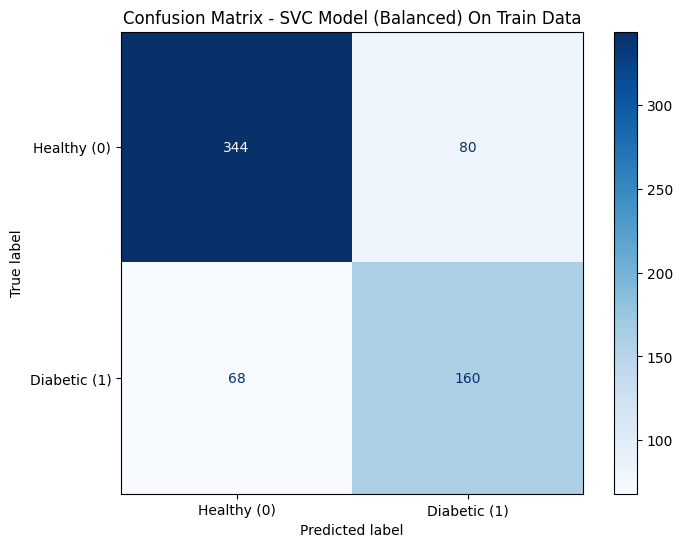


--- Matrix Breakdown ---
True Negatives (Actual Non Diabetic): 344
False Positives (Type-I Error / False Alarm): 80
False Negatives (Type-II Error / Missed Case): 68  <-- Focus on that
True Positives (Actual Diabetic): 160


In [38]:
# 2. Calculate Confusion Matrix
cm = confusion_matrix(Y_train, train_prediction)

# 3. Visualization Creation
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy (0)', 'Diabetic (1)'])

# Plotting with a nice color map
disp.plot(ax=ax, cmap='Blues', values_format='d')

plt.title('Confusion Matrix - SVC Model (Balanced) On Train Data')
plt.grid(False) # to remove grid lines
plt.show()

# 4. Matrix Breakdown (Manual print for clarity)
tn, fp, fn, tp = cm.ravel()
print(f"\n--- Matrix Breakdown ---")
print(f"True Negatives (Actual Non Diabetic): {tn}")
print(f"False Positives (Type-I Error / False Alarm): {fp}")
print(f"False Negatives (Type-II Error / Missed Case): {fn}  <-- Focus on that")
print(f"True Positives (Actual Diabetic): {tp}")

In [39]:
test_prediction=svc_classifier.predict(X_test_scaled)
test_accuracy=accuracy_score(Y_test,test_prediction)
test_recall=recall_score(Y_test,test_prediction)
test_f1_score=f1_score(Y_test,test_prediction)
test_precision=precision_score(Y_test,test_prediction)
print('testing accuracy is :',test_accuracy*100)
print('testing recall is :',test_recall*100)
print('testing f1 score is :',test_f1_score*100)
print('testing precision is :',test_precision*100)


testing accuracy is : 76.72413793103449
testing recall is : 77.5
testing f1 score is : 69.66292134831461
testing precision is : 63.26530612244898


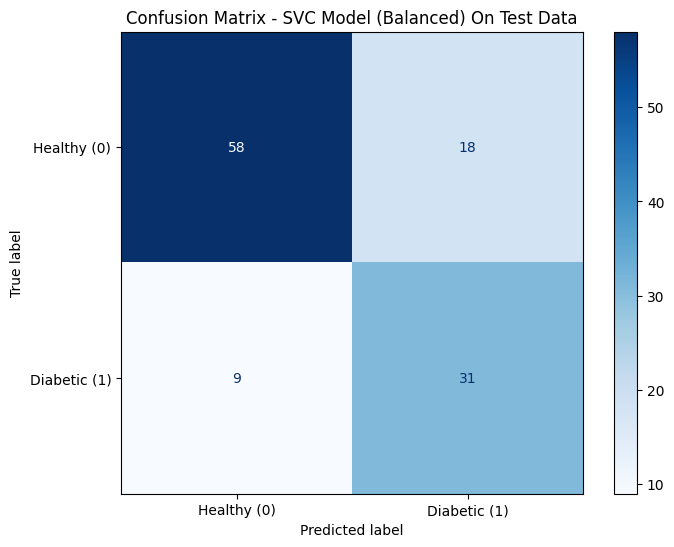


--- Matrix Breakdown ---
True Negatives (Actual None Diabetic): 58
False Positives (Type I Error/ False Alarm): 18
False Negatives (Type II Error/ Missed Case): 9  <-- ISPE NAZAR RAKHO!
True Positives (Actual Diabetic): 31


In [40]:
# 2. Confusion Matrix calculation
cm = confusion_matrix(Y_test, test_prediction)

# 3. Visualization creation
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy (0)', 'Diabetic (1)'])

# Plotting with a nice color map
disp.plot(ax=ax, cmap='Blues', values_format='d')

plt.title('Confusion Matrix - SVC Model (Balanced) On Test Data')
plt.grid(False) # Grid lines removed
plt.show()

# 4. Matrix Breakdown (Manual print for clarity)
tn, fp, fn, tp = cm.ravel()
print(f"\n--- Matrix Breakdown ---")
print(f"True Negatives (Actual None Diabetic): {tn}")
print(f"False Positives (Type I Error/ False Alarm): {fp}")
print(f"False Negatives (Type II Error/ Missed Case): {fn}  <-- ISPE NAZAR RAKHO!")
print(f"True Positives (Actual Diabetic): {tp}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}

--- Tuned SVC Report ---
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        76
           1       0.63      0.78      0.70        40

    accuracy                           0.77       116
   macro avg       0.75      0.77      0.75       116
weighted avg       0.79      0.77      0.77       116



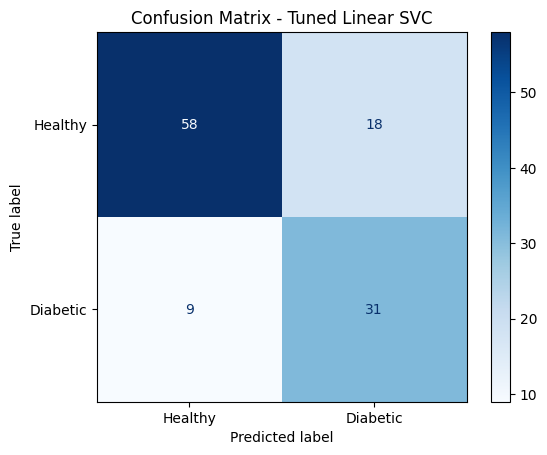

In [41]:
# Perform Hyperparameter tuning on SVC with linear kernel
# 1. Parameter Grid define karein
# C: Regularization parameter (Smaller the C value, larger'll be the margin)
param_grid = {
    'C': [0.01, 0.1, 1],
    'class_weight': ['balanced', None],
    'kernel': ['linear']
}

# 2. GridSearchCV setup
# scoring='f1' was set to ensure proper balance between precision and recall
grid_search = GridSearchCV(svm.SVC(probability=True), param_grid, cv=5, scoring='f1', verbose=1)

# 3. Fit on Scaled Training Data
grid_search.fit(X_train_scaled, Y_train)

# 4. Best Parameters checking
print(f"Best Parameters: {grid_search.best_params_}")

# 5.prediction via best model
best_svc = grid_search.best_estimator_
y_pred_tuned = best_svc.predict(X_test_scaled)

# 6. Final Results
print("\n--- Tuned SVC Report ---")
print(classification_report(Y_test, y_pred_tuned))

# 7. Confusion Matrix plot
cm_tuned = confusion_matrix(Y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['Healthy', 'Diabetic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Linear SVC")
plt.show()

In [42]:
trained_y_tuned = best_svc.predict(X_train_scaled)
print('training accuracy is :',accuracy_score(Y_train,trained_y_tuned)*100)
print('training recall is :',recall_score(Y_train,trained_y_tuned)*100)
print('training f1 score is :',f1_score(Y_train,trained_y_tuned)*100)
print('training precision is :',precision_score(Y_train,trained_y_tuned)*100)

training accuracy is : 77.30061349693251
training recall is : 70.17543859649122
training f1 score is : 68.37606837606837
training precision is : 66.66666666666666


In [43]:
print('after fine tuning the SVC model with linear kernel, performance of hypertuned SVC linear kernel model on test data is -')
print('testing accuracy is :',accuracy_score(Y_test,y_pred_tuned)*100)
print('testing recall is :',recall_score(Y_test,y_pred_tuned)*100)
print('testing f1 score is :',f1_score(Y_test,y_pred_tuned)*100)
print('testing precision is :',precision_score(Y_test,y_pred_tuned)*100)


after fine tuning the SVC model with linear kernel, performance of hypertuned SVC linear kernel model on test data is -
testing accuracy is : 76.72413793103449
testing recall is : 77.5
testing f1 score is : 69.66292134831461
testing precision is : 63.26530612244898


In [44]:
print('-'*130)

----------------------------------------------------------------------------------------------------------------------------------


In [45]:
# NOW, APPLY RANDOM FOREST CLASSIFIER
# U can use X_train_scaled and X_train both because random forest classifier is not sensitive to scaling
rf_model = RandomForestClassifier(n_estimators=200,
    max_depth=5,           # Avoid max depth as much as possible
    min_samples_leaf=5,    # Each leaf node contains atleast 5 samples or data points
    class_weight='balanced',
    random_state=42)
rf_model.fit(X_train_scaled, Y_train) # U can also use X_train as well as the tree based models are'nt sensitive to scaling
training_prediction_by_rf_model=rf_model.predict(X_train_scaled)
print('training accuracy of Random Forest Classifier is :',accuracy_score(Y_train,training_prediction_by_rf_model)*100)
print('training recall of Random Forest Classifier is :',recall_score(Y_train,training_prediction_by_rf_model)*100)
print('training f1 score of Random Forest Classifier is :',f1_score(Y_train,training_prediction_by_rf_model)*100)
print('training precision of Random Forest Classifier is :',precision_score(Y_train,training_prediction_by_rf_model)*100)


training accuracy of Random Forest Classifier is : 82.66871165644172
training recall of Random Forest Classifier is : 85.96491228070175
training f1 score of Random Forest Classifier is : 77.62376237623762
training precision of Random Forest Classifier is : 70.7581227436823


In [46]:
testing_prediction_by_rf_model=rf_model.predict(X_test_scaled)
print('testing accuracy of Random Forest Classifier is :',accuracy_score(Y_test,testing_prediction_by_rf_model)*100)
print('testing recall of Random Forest Classifier is :',recall_score(Y_test,testing_prediction_by_rf_model)*100)
print('testing f1 score of Random Forest Classifier is :',f1_score(Y_test,testing_prediction_by_rf_model)*100)
print('testing precision of Random Forest Classifier is :',precision_score(Y_test,testing_prediction_by_rf_model)*100)


testing accuracy of Random Forest Classifier is : 76.72413793103449
testing recall of Random Forest Classifier is : 82.5
testing f1 score of Random Forest Classifier is : 70.96774193548387
testing precision of Random Forest Classifier is : 62.264150943396224


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

--- Final Tuned Random Forest Report ---
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        76
           1       0.65      0.78      0.70        40

    accuracy                           0.78       116
   macro avg       0.76      0.78      0.76       116
weighted avg       0.79      0.78      0.78       116



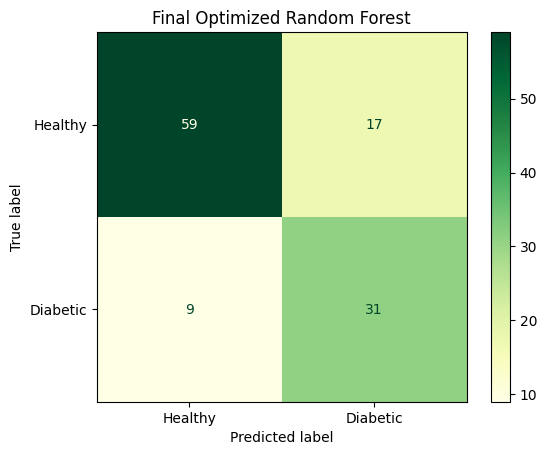

In [47]:
# Perform hyperparameter tuning on random forest classifier model
# 1. Define Parameter Grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balanced', 'balanced_subsample']
}

# 2. GridSearchCV setup  (Focusing on F1 or Recall)
# We focus on f1 score to ensure proper balance between recall and precision
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf,
                       cv=5,
                       scoring='f1',
                       n_jobs=-1,
                       verbose=1)

# 3. Fit on Scaled Training Data
rf_grid.fit(X_train_scaled, Y_train)

# 4. Find Best Parameters and Best Model
print(f"Best Parameters: {rf_grid.best_params_}")
best_rf_model = rf_grid.best_estimator_

# 5. Final Predictions on Test Data
y_pred_final = best_rf_model.predict(X_test_scaled)

# 6. Performance Report
print("\n--- Final Tuned Random Forest Report ---")
print(classification_report(Y_test, y_pred_final))

# 7. Final Confusion Matrix
cm_final = confusion_matrix(Y_test, y_pred_final)
ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=['Healthy', 'Diabetic']).plot(cmap='YlGn')
plt.title("Final Optimized Random Forest")
plt.show()

In [48]:
trained_rf_tuned_pred = best_rf_model.predict(X_train_scaled)
print("after fine tuning the random forest classifier ")
print('training accuracy of Random Forest Classifier is :',accuracy_score(Y_train,trained_rf_tuned_pred)*100)
print('training recall of Random Forest Classifier is :',recall_score(Y_train,trained_rf_tuned_pred)*100)
print('training f1 score of Random Forest Classifier is :',f1_score(Y_train,trained_rf_tuned_pred)*100)
print('training precision of Random Forest Classifier is :',precision_score(Y_train,trained_rf_tuned_pred)*100)


after fine tuning the random forest classifier 
training accuracy of Random Forest Classifier is : 88.49693251533742
training recall of Random Forest Classifier is : 90.35087719298247
training f1 score of Random Forest Classifier is : 84.59958932238193
training precision of Random Forest Classifier is : 79.53667953667953


In [49]:
print("after fine tuning the random forest classifier ")
print('testing accuracy of Random Forest Classifier is :',accuracy_score(Y_test,y_pred_final)*100)
print('testing recall of Random Forest Classifier is :',recall_score(Y_test,y_pred_final)*100)
print('testing f1 score of Random Forest Classifier is :',f1_score(Y_test,y_pred_final)*100)
print('testing precision of Random Forest Classifier is :',precision_score(Y_test,y_pred_final)*100)


after fine tuning the random forest classifier 
testing accuracy of Random Forest Classifier is : 77.58620689655173
testing recall of Random Forest Classifier is : 77.5
testing f1 score of Random Forest Classifier is : 70.45454545454545
testing precision of Random Forest Classifier is : 64.58333333333334


In [50]:
print('-----------------------------------------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------------------------------------


In [51]:
print("------------------ LINEAR KERNEL SVC MODEL BEFORE FINE TUNING---------------------")
print('training accuracy is :',training_accuracy*100)
print('training recall is :',training_recall*100)
print('training f1 score is :',training_f1_score*100)
print('training precision is :',training_precision*100)
print(70*'-')
print('testing accuracy is :',test_accuracy*100)
print('testing recall is :',test_recall*100)
print('testing f1 score is :',test_f1_score*100)
print('testing precision is :',test_precision*100)


------------------ LINEAR KERNEL SVC MODEL BEFORE FINE TUNING---------------------
training accuracy is : 77.30061349693251
training recall is : 70.17543859649122
training f1 score is : 68.37606837606837
training precision is : 66.66666666666666
----------------------------------------------------------------------
testing accuracy is : 76.72413793103449
testing recall is : 77.5
testing f1 score is : 69.66292134831461
testing precision is : 63.26530612244898


In [52]:
print("------------------ LINEAR KERNEL SVC MODEL AFTER FINE TUNING---------------------")

print('training accuracy is :',accuracy_score(Y_train,trained_y_tuned)*100)
print('training recall is :',recall_score(Y_train,trained_y_tuned)*100)
print('training f1 score is :',f1_score(Y_train,trained_y_tuned)*100)
print('training precision is :',precision_score(Y_train,trained_y_tuned)*100)

print(70*'-')
print('testing accuracy is :',accuracy_score(Y_test,y_pred_tuned)*100)
print('testing recall is :',recall_score(Y_test,y_pred_tuned)*100)
print('testing f1 score is :',f1_score(Y_test,y_pred_tuned)*100)
print('testing precision is :',precision_score(Y_test,y_pred_tuned)*100)



------------------ LINEAR KERNEL SVC MODEL AFTER FINE TUNING---------------------
training accuracy is : 77.30061349693251
training recall is : 70.17543859649122
training f1 score is : 68.37606837606837
training precision is : 66.66666666666666
----------------------------------------------------------------------
testing accuracy is : 76.72413793103449
testing recall is : 77.5
testing f1 score is : 69.66292134831461
testing precision is : 63.26530612244898


In [53]:
print("------------------ Random Forest Classifier MODEL BEFORE FINE TUNING---------------------")

print('training accuracy of Random Forest Classifier is :',accuracy_score(Y_train,training_prediction_by_rf_model)*100)
print('training recall of Random Forest Classifier is :',recall_score(Y_train,training_prediction_by_rf_model)*100)
print('training f1 score of Random Forest Classifier is :',f1_score(Y_train,training_prediction_by_rf_model)*100)
print('training precision of Random Forest Classifier is :',precision_score(Y_train,training_prediction_by_rf_model)*100)

print(70*'-')
print('testing accuracy of Random Forest Classifier is :',accuracy_score(Y_test,testing_prediction_by_rf_model)*100)
print('testing recall of Random Forest Classifier is :',recall_score(Y_test,testing_prediction_by_rf_model)*100)
print('testing f1 score of Random Forest Classifier is :',f1_score(Y_test,testing_prediction_by_rf_model)*100)
print('testing precision of Random Forest Classifier is :',precision_score(Y_test,testing_prediction_by_rf_model)*100)


------------------ Random Forest Classifier MODEL BEFORE FINE TUNING---------------------
training accuracy of Random Forest Classifier is : 82.66871165644172
training recall of Random Forest Classifier is : 85.96491228070175
training f1 score of Random Forest Classifier is : 77.62376237623762
training precision of Random Forest Classifier is : 70.7581227436823
----------------------------------------------------------------------
testing accuracy of Random Forest Classifier is : 76.72413793103449
testing recall of Random Forest Classifier is : 82.5
testing f1 score of Random Forest Classifier is : 70.96774193548387
testing precision of Random Forest Classifier is : 62.264150943396224


In [54]:
print("------------------ Random Forest Classifier MODEL AFTER FINE TUNING---------------------")

print('training accuracy of Random Forest Classifier is :',accuracy_score(Y_train,trained_rf_tuned_pred)*100)
print('training recall of Random Forest Classifier is :',recall_score(Y_train,trained_rf_tuned_pred)*100)
print('training f1 score of Random Forest Classifier is :',f1_score(Y_train,trained_rf_tuned_pred)*100)
print('training precision of Random Forest Classifier is :',precision_score(Y_train,trained_rf_tuned_pred)*100)
print(70*'-')
print('testing accuracy of Random Forest Classifier is :',accuracy_score(Y_test,y_pred_final)*100)
print('testing recall of Random Forest Classifier is :',recall_score(Y_test,y_pred_final)*100)
print('testing f1 score of Random Forest Classifier is :',f1_score(Y_test,y_pred_final)*100)
print('testing precision of Random Forest Classifier is :',precision_score(Y_test,y_pred_final)*100)


------------------ Random Forest Classifier MODEL AFTER FINE TUNING---------------------
training accuracy of Random Forest Classifier is : 88.49693251533742
training recall of Random Forest Classifier is : 90.35087719298247
training f1 score of Random Forest Classifier is : 84.59958932238193
training precision of Random Forest Classifier is : 79.53667953667953
----------------------------------------------------------------------
testing accuracy of Random Forest Classifier is : 77.58620689655173
testing recall of Random Forest Classifier is : 77.5
testing f1 score of Random Forest Classifier is : 70.45454545454545
testing precision of Random Forest Classifier is : 64.58333333333334


In [55]:
print(130*'-')

----------------------------------------------------------------------------------------------------------------------------------


In [56]:
# IMPLEMENT LOGISTIC REGRESSION MODEL
# 1. Initialize Logistic Regression
# 'liblinear' solver are best choice for smaller dataset as we have only 784 data points
log_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# 2. Train the model (Always use scaled data as this logistic regression models are distance based and sensitive to scaling)
log_model.fit(X_train_scaled, Y_train)

print("------------------ LOGISTIC REGRESSION MODEL BEFORE FINE TUNING---------------------")
# 3. Predict on train Data
trained_y_pred_log = log_model.predict(X_train_scaled)

print('training accuracy of logistic regression is :',accuracy_score(Y_train,trained_y_pred_log)*100)
print('training recall of logistic regression is :',recall_score(Y_train,trained_y_pred_log)*100)
print('training f1 score of logistic regression is :',f1_score(Y_train,trained_y_pred_log)*100)
print('training precision of logistic regression is :',precision_score(Y_train,trained_y_pred_log)*100)
print(70*'-')
# 3. Predict on test Data
test_y_pred_log = log_model.predict(X_test_scaled)

print('testing accuracy of logistic regression is :',accuracy_score(Y_test,test_y_pred_log)*100)
print('testing recall of logistic regression is :',recall_score(Y_test,test_y_pred_log)*100)
print('testing f1 score of logistic regression is :',f1_score(Y_test,test_y_pred_log)*100)
print('testing precision of logistic regression is :',precision_score(Y_test,test_y_pred_log)*100)


------------------ LOGISTIC REGRESSION MODEL BEFORE FINE TUNING---------------------
training accuracy of logistic regression is : 76.99386503067484
training recall of logistic regression is : 72.36842105263158
training f1 score of logistic regression is : 68.75
training precision of logistic regression is : 65.47619047619048
----------------------------------------------------------------------
testing accuracy of logistic regression is : 77.58620689655173
testing recall of logistic regression is : 80.0
testing f1 score of logistic regression is : 71.11111111111111
testing precision of logistic regression is : 64.0


In [57]:
# NOW PERFORM HYPERPARAMETER TUNING ON LOGISTIC REGRESSION MODEL
# 1. Parameter Grid define karein
# C: Inverse of regularization strength (Small C = Strong regularization)
# penalty: 'l1' (Lasso) or 'l2' (Ridge)
param_grid_log = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # 'liblinear' supports both l1 and l2
}

# 2. GridSearchCV setup karein
# scoring='recall' because positive cases should not be missed in medical conditions
grid_log = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42),
    param_grid_log,
    cv=5,
    scoring='recall',
    verbose=1
)

# 3. Train on Scaled Data
grid_log.fit(X_train_scaled, Y_train)

# 4. Best Parameters check
print(f"Best Parameters: {grid_log.best_params_}")
print()
best_log_model = grid_log.best_estimator_

# 5. Predictions & Results
trained_y_pred_log_tuned = best_log_model.predict(X_train_scaled)
test_y_pred_log_tuned = best_log_model.predict(X_test_scaled)

print("------------------ LOGISTIC REGRESSION MODEL AFTER FINE TUNING---------------------")
print('training accuracy of logistic regression is :',accuracy_score(Y_train,trained_y_pred_log_tuned)*100)
print('training recall of logistic regression is :',recall_score(Y_train,trained_y_pred_log_tuned)*100)
print('training f1 score of logistic regression is :',f1_score(Y_train,trained_y_pred_log_tuned)*100)
print('training precision of logistic regression is :',precision_score(Y_train,trained_y_pred_log_tuned)*100)
print(70*'-')
print('testing accuracy of logistic regression is :',accuracy_score(Y_test,test_y_pred_log_tuned)*100)
print('testing recall of logistic regression is :',recall_score(Y_test,test_y_pred_log_tuned)*100)
print('testing f1 score of logistic regression is :',f1_score(Y_test,test_y_pred_log_tuned)*100)
print('testing precision of logistic regression is :',precision_score(Y_test,test_y_pred_log_tuned)*100)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

------------------ LOGISTIC REGRESSION MODEL AFTER FINE TUNING---------------------
training accuracy of logistic regression is : 69.93865030674846
training recall of logistic regression is : 82.89473684210526
training f1 score of logistic regression is : 65.85365853658537
training precision of logistic regression is : 54.6242774566474
----------------------------------------------------------------------
testing accuracy of logistic regression is : 69.82758620689656
testing recall of logistic regression is : 90.0
testing f1 score of logistic regression is : 67.28971962616822
testing precision of logistic regression is : 53.73134328358209


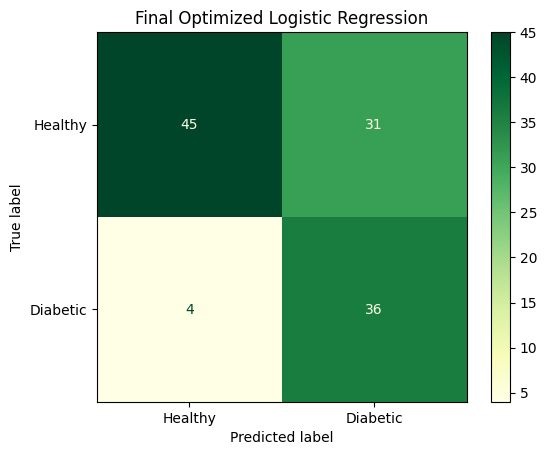

In [58]:
cm_final = confusion_matrix(Y_test, test_y_pred_log_tuned)
ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=['Healthy', 'Diabetic']).plot(cmap='YlGn')
plt.title("Final Optimized Logistic Regression")
plt.show()

In [59]:
print("Our Prime focus was on Reducing the false negative i.e Recall as per our Business objective since in Medical Fields, predicting a diabetic patient as a non diabetic patient will significant lead to compromize with patient's life ")

Our Prime focus was on Reducing the false negative i.e Recall as per our Business objective since in Medical Fields, predicting a diabetic patient as a non diabetic patient will significant lead to compromize with patient's life 


In [60]:
print("Comparing with all these 3 models -> logistic regression, SVC(kernel=linear) and random forest classifier, we found that fined tuned logistic regression has highest recall on testing data in comparison to other 2 models")

Comparing with all these 3 models -> logistic regression, SVC(kernel=linear) and random forest classifier, we found that fined tuned logistic regression has highest recall on testing data in comparison to other 2 models


In [61]:
print("------------------ LOGISTIC REGRESSION MODEL AFTER FINE TUNING---------------------")
print('training accuracy of logistic regression is :',accuracy_score(Y_train,trained_y_pred_log_tuned)*100)
print('training recall of logistic regression is :',recall_score(Y_train,trained_y_pred_log_tuned)*100)
print('training f1 score of logistic regression is :',f1_score(Y_train,trained_y_pred_log_tuned)*100)
print('training precision of logistic regression is :',precision_score(Y_train,trained_y_pred_log_tuned)*100)
print(70*'-')
print('testing accuracy of logistic regression is :',accuracy_score(Y_test,test_y_pred_log_tuned)*100)
print('testing recall of logistic regression is :',recall_score(Y_test,test_y_pred_log_tuned)*100)
print('testing f1 score of logistic regression is :',f1_score(Y_test,test_y_pred_log_tuned)*100)
print('testing precision of logistic regression is :',precision_score(Y_test,test_y_pred_log_tuned)*100)


------------------ LOGISTIC REGRESSION MODEL AFTER FINE TUNING---------------------
training accuracy of logistic regression is : 69.93865030674846
training recall of logistic regression is : 82.89473684210526
training f1 score of logistic regression is : 65.85365853658537
training precision of logistic regression is : 54.6242774566474
----------------------------------------------------------------------
testing accuracy of logistic regression is : 69.82758620689656
testing recall of logistic regression is : 90.0
testing f1 score of logistic regression is : 67.28971962616822
testing precision of logistic regression is : 53.73134328358209


In [62]:
joblib.dump(best_log_model,'diabetes_model.pkl')

['diabetes_model.pkl']

In [63]:
X_train

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
394,4,158.000000,78.0,29.15342,125.0,32.9,0.803,31
352,3,61.000000,82.0,28.00000,125.0,34.4,0.243,46
275,2,100.000000,70.0,52.00000,57.0,40.5,0.677,25
355,9,165.000000,88.0,29.15342,125.0,30.4,0.302,49
38,2,90.000000,68.0,42.00000,125.0,38.2,0.503,27
...,...,...,...,...,...,...,...,...
45,0,180.000000,66.0,39.00000,125.0,42.0,1.893,25
526,1,97.000000,64.0,19.00000,82.0,18.2,0.299,21
295,6,151.000000,62.0,31.00000,120.0,35.5,0.692,28
630,7,114.000000,64.0,29.15342,125.0,27.4,0.732,34


In [64]:
Y_train

,diabetes
394,1
352,0
275,0
355,1
38,1
...,...
45,1
526,0
295,0
630,1


In [65]:
def predict_diabetes(input_data):
    """
    input_data: list of features [Pregnancies, Glucose, BloodPressure,Thickness,
                                  Insulin, BMI, DiabetesPedigreeFunction, Age]
    """
    # 1. Transform your input data into numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # 2. Reshape your data since we are making prediction for single instance at a time
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    print(input_data_reshaped)
    # 3. IMPORTANT: use that same feature scaler i.e Robust Scaler over here ,that we've used during training. it is essential as we also required it to scale the user inputs
    std_data = scaler.transform(input_data_reshaped)

    # 4. Make Prediction
    # Use your finalized model i.e best_log_model (i.e your logistic regression model)
    prediction = best_log_model.predict(std_data)

    # 5. Output display
    if (prediction[0] == 0):
        return "The person is NOT diabetic."
    else:
        return "The person IS diabetic."

# --- System Check (Example Patient Data) ---
# Example: [5, 166, 72, 19, 175, 25.8, 0.587, 51]
new_patient = [5,121,72,23,112,26.2,0.245,30]
result = predict_diabetes(new_patient)
print(f"Prediction Result: {result}")


[[  5.    121.     72.     23.    112.     26.2     0.245  30.   ]]
Prediction Result: The person is NOT diabetic.


In [66]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [67]:
X_test

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
560,6,125.0,76.0,29.15342,125.0,33.8,0.121,54
578,10,133.0,68.0,29.15342,125.0,27.0,0.245,36
648,11,136.0,84.0,35.00000,130.0,28.3,0.260,42
419,3,129.0,64.0,29.00000,115.0,26.4,0.219,28
97,1,71.0,48.0,18.00000,76.0,20.4,0.323,22
...,...,...,...,...,...,...,...,...
536,0,105.0,90.0,29.15342,125.0,29.6,0.197,46
542,10,90.0,85.0,32.00000,125.0,34.9,0.825,56
688,1,140.0,74.0,26.00000,180.0,24.1,0.828,23
186,8,181.0,68.0,36.00000,495.0,30.1,0.615,60


In [68]:
Y_test

,diabetes
560,1
578,0
648,1
419,1
97,0
...,...
536,0
542,1
688,0
186,1
